## Importing data in Python

As essential first step in a data scientist's work is to import the data from various sources, and work with diverse formats and data structures. 

In this notebook, we will practice importing data from a few types of files:
- regular text files
- comma separated values (csv files)- super common task for a data scientist
- Excel sheet - also quite common
- connect and import data from SQL databases

In [2]:
# The two main libraries you will need
import numpy as np
import pandas as pd

### Import a regular text file

The first simple type of file we will work with is a text file. We can import it in a few ways. First, without numpy and then, using numpy.

**Q1. Import the *movie_reviews.txt* without using numpy.**

In [41]:
#filename = 'Data/movie_reviews.txt'
file = open('Data/movie_reviews.txt', mode='r')
text = file.read()
file.close()
print(text)

this movie sucks, negative
this movie is great, positive
The movie is a flop, negative
I recommend it to my friends, positive
I will ask my friends to watch it if I want them to suffer, negative


Another solution is more of a one-liner and uses **with**

In [43]:
# Or a one-liner, using with:
with open('Data/movie_reviews.txt', mode='r') as file:
    print(file.read())

this movie sucks, negative
this movie is great, positive
The movie is a flop, negative
I recommend it to my friends, positive
I will ask my friends to watch it if I want them to suffer, negative


Another option is to import it using numpy. The advantage is that the output will be a numpy array. 
However, this may not work so easy when we have mixed data types. Since in the movie reviews file we only have data of type string, that won't be such an issue though. 

**Q2. Try importing the movie_reviews text file using the .loadtxt() function in numpy. Make sure you specify all necessary arguments (HINT: dtype could be an important one here).**

In [7]:
# Import using numpy

text2 = np.loadtxt('Data/movie_reviews.txt', delimiter=',', dtype='str')
text2

array([['this movie sucks', ' negative'],
       ['this movie is great', ' positive'],
       ['The movie is a flop', ' negative'],
       ['I recommend it to my friends', ' positive'],
       ['I will ask my friends to watch it if I want them to suffer',
        ' negative']], dtype='<U58')

### Importing csv files

CSV files are very common in data science. In your career as a data scientist, they will be one of the most frequent files you work with. Therefore, it's important you get a lot of practice opening and working with .csv files. 


**Q3. Open the gender_wage_gap_NL.csv file using pandas and specify the column 'Periods' to be the index. You may want to specify fields such as the sep and header.** 

In [8]:
df = pd.read_csv('Data/gender_wage_gap_NL.csv', index_col='Periods', header=0, sep=',')
df.head()

,Sex of employee,Type of employment contract,Other characteristics employee,Industry class / branch (SIC2008),Employment Jobs (x 1 000),Wage per job Hourly wage (euro),Wage per job Yearly wage\nYearly wage including bonuses (euro),Yearly wage Yearly wage excluding special payments (euro)
Periods,,,,,,,,
2010 after change of method,Sex: Male,Total,Total,A-U All economic activities,"4,175",22.01,"38,810","33,670"
2011,Sex: Male,Total,Total,A-U All economic activities,"4,197",22.22,"39,250","33,970"
2012,Sex: Male,Total,Total,A-U All economic activities,"4,144",22.75,"39,680","34,440"
2013,Sex: Male,Total,Total,A-U All economic activities,"4,063",22.99,"40,490","34,850"
2014,Sex: Male,Total,Total,A-U All economic activities,"4,043",23.05,"40,510","35,050"


There are many more parameters we can specify in the read_csv function. Explore what they are by calling help().

In [9]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer: Union[str, pathlib.Path, IO[~AnyStr]], sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression='infer', thousands=None, decimal: str = '.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, dialect=None, error_bad_lines=True, warn_bad_lines=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)
    Read a comma-separated values (csv) file in

### Import Excel sheets

Another common scenario for a data scientist is to work with data stored in Excel sheets. Often, the data in Excel sheets can be messy as we can have multiple lines for a header, there could be a footer (some lines in the end we may want to skip), we usually need to specify which sheet we want to import (if multiple), and the data can be quite different in each sheet. 


In this exercise, we will work with a relatively simple data about wealth distribution in the Netherlands, which I have downloaded from Centraal Bureau Statistiek (CBS, or Central Bureau of Statistics in the Netherlands). 

**Q4. Import the 'wealth distribution hh' excel sheet. Specify the 'Perioden' column as an index, and first only the first 15 rows and first 5 columns.**

In [74]:
wealth = pd.read_excel('Data/wealth distribution hh.xlsx', index_col= 'Perioden', nrows=15, usecols=[0,1,2,3,4])
wealth.head()

,Huishoudenskenmerken,Totaal bedrag/Vermogenssaldo (mln euro),Totaal bedrag/Vorderingen/Totaal (mln euro),Totaal bedrag/Vorderingen/Chartaal geld en deposito's (mln euro)
Perioden,,,,
2018*,Totaal,3345119,2449739,405760
2018*,Beschikbaar inkomen 1e 20%-groep,199632,183508,35172
2018*,Beschikbaar inkomen 2e 20%-groep,306598,240290,47580
2018*,Beschikbaar inkomen 3e 20%-groep,558342,396451,68862
2018*,Beschikbaar inkomen 4e 20%-groep,787997,560004,89964


In [62]:
help(pd.read_excel)

Help on function read_excel in module pandas.io.excel._base:

read_excel(io, sheet_name=0, header=0, names=None, index_col=None, usecols=None, squeeze=False, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skiprows=None, nrows=None, na_values=None, keep_default_na=True, verbose=False, parse_dates=False, date_parser=None, thousands=None, comment=None, skipfooter=0, convert_float=True, mangle_dupe_cols=True, **kwds)
    Read an Excel file into a pandas DataFrame.
    
    Supports `xls`, `xlsx`, `xlsm`, `xlsb`, and `odf` file extensions
    read from a local filesystem or URL. Supports an option to read
    a single sheet or a list of sheets.
    
    Parameters
    ----------
    io : str, bytes, ExcelFile, xlrd.Book, path object, or file-like object
        Any valid string path is acceptable. The string could be a URL. Valid
        URL schemes include http, ftp, s3, and file. For file URLs, a host is
        expected. A local file could be: ``file://loc

### Import and query a database

Relational databases are super common data structures. Unlike single data frames, the tables there can be linked. Each table would contain a primary key (which could be a single column or a combination of columns), and other information. One may use SQL (structured query language) to query, and/or filter some of the data in a database and select only the needed table(s) for the task at hand. 


There are not many free relational databases out there, so in the exercises we will use the same as the weekly assignment, namely the chinook database. 


Make sure you go to the link to download it (as a ZIP file): https://www.sqlitetutorial.net/sqlite-sample-database/ 
It is also stored in the Google drive folder which I shared. 

There are two common packages to connect to and query a database engine: ***sqlalchemy*** and ***sqlite3***. We will practice working with both. 

Let's first connect to the SQL database using the sqlalchmey package and explore the tables there. 

In [4]:
from sqlalchemy import create_engine

In [5]:
engine = create_engine("sqlite:///C:/Users/mishe/sqlite/chinook.db")
engine.table_names()

['albums',
 'artists',
 'customers',
 'employees',
 'genres',
 'invoice_items',
 'invoices',
 'media_types',
 'playlist_track',
 'playlists',
 'sqlite_sequence',
 'sqlite_stat1',
 'tracks']

**Q6. Import the albums data set, selecting all the rows and columns from it.**

In [13]:
con = engine.connect()
rs = con.execute('Select * from albums')
df = pd.DataFrame(rs.fetchall())
print(rs.keys())
df.columns = rs.keys()
df.head()

['AlbumId', 'Title', 'ArtistId']


,AlbumId,Title,ArtistId
0,1,For Those About To Rock We Salute You,1
1,2,Balls to the Wall,2
2,3,Restless and Wild,2
3,4,Let There Be Rock,1
4,5,Big Ones,3


In [22]:
con.close()

**Q7. Do the same (i.e. import everything from albums) but using pd.read_sql_query.**

In [6]:
df = pd.read_sql_query('select * from albums', engine)
df.head()

,AlbumId,Title,ArtistId
0,1,For Those About To Rock We Salute You,1
1,2,Balls to the Wall,2
2,3,Restless and Wild,2
3,4,Let There Be Rock,1
4,5,Big Ones,3


In [8]:
df = pd.read_sql_query('select * from albums LIMIT 5', engine)
df

,AlbumId,Title,ArtistId
0,1,For Those About To Rock We Salute You,1
1,2,Balls to the Wall,2
2,3,Restless and Wild,2
3,4,Let There Be Rock,1
4,5,Big Ones,3


Let's work now with sqlite. Connect to the database using sqlite3. 

In [15]:
import sqlite3
con = sqlite3.connect("C:/Users/mishe/sqlite/chinook.db")

**Q8. Import all columns and rows from the albums data set, and print out only the first 5 rows.**

In [29]:
cur = con.cursor()
cur.execute("SELECT * from albums")
rows = cur.fetchall()
print(rows[:5]) # print only first 5 rows

[(1, 'For Those About To Rock We Salute You', 1), (2, 'Balls to the Wall', 2), (3, 'Restless and Wild', 2), (4, 'Let There Be Rock', 1), (5, 'Big Ones', 3)]


,0,1,2
0,1,For Those About To Rock We Salute You,1
1,2,Balls to the Wall,2
2,3,Restless and Wild,2
3,4,Let There Be Rock,1
4,5,Big Ones,3


**Q9. Do the same using pandas and read_sql_query.**

In [21]:
df1 = pd.read_sql_query("SELECT * from albums", con)
df1.head()

,AlbumId,Title,ArtistId
0,1,For Those About To Rock We Salute You,1
1,2,Balls to the Wall,2
2,3,Restless and Wild,2
3,4,Let There Be Rock,1
4,5,Big Ones,3


#### Merge the artists and albums

One very common task is to merge data sets together. We need to specify the columns on which we are merging and the type of merging (left, right, inner, outer join). Joins will be covered in detail in later weeks but here is a short spoiler :) 

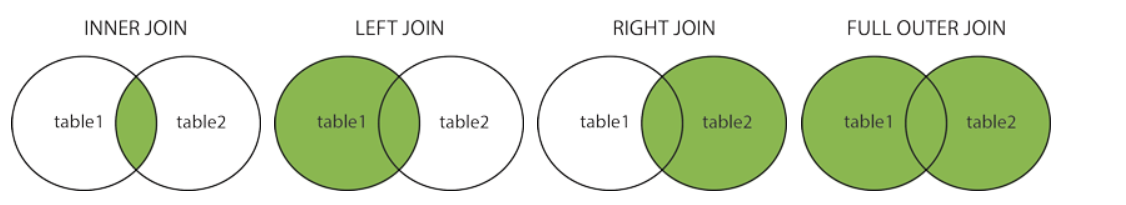

We will practice with an inner join: it takes the intersection of those rows which are located in both tables.

In [24]:
# We will join the artists and albums tables
df_join = pd.read_sql_query('SELECT l.Title, r.Name FROM albums as l \
                            INNER JOIN artists as r\
                            on  l.ArtistId=r.ArtistId', con)
df_join.head()

,Title,Name
0,For Those About To Rock We Salute You,AC/DC
1,Balls to the Wall,Accept
2,Restless and Wild,Accept
3,Let There Be Rock,AC/DC
4,Big Ones,Aerosmith


**Filtering**

Another common task is filtering: let's say we only select the AC/DC band from the artists data. The way to do that is using a **WHERE** statement. 

In [25]:
df_acdc = pd.read_sql_query('Select * from artists where Name=="AC/DC"', con)
df_acdc.head()

,ArtistId,Name
0,1,AC/DC


The result is not super interesting, so let's change the task. 

**Q10. Join the artist and albums data sets (using an inner join) and selecting only the rows corresponding to the band 'AC/DC'.**

In [27]:
acdc_join = pd.read_sql_query('SELECT l.Title, r.Name FROM albums as l\
                            INNER JOIN artists as r\
                            on  l.ArtistId=r.ArtistId\
                            where r.Name=="AC/DC"', con)
acdc_join.head()

,Title,Name
0,For Those About To Rock We Salute You,AC/DC
1,Let There Be Rock,AC/DC


**Grouping**

Often we want to perform some aggregations per a group (say, counts of albums per artist/band), etc. We will utilize **Group by** for that.

Let's group by ArtistId and count the number of albums. Here is how we do that.

In [28]:
artists_grouped = pd.read_sql_query('select count(ArtistId) as cnt_albums, ArtistId from albums group by ArtistId', con)
artists_grouped.head()

,cnt_albums,ArtistId
0,2,1
1,2,2
2,1,3
3,1,4
4,1,5
